# Kalman Filter for Gaussian Random Walk

A very simple example of KF is to track a Gaussian random walk. This scalar system model is given by

$$\begin{align}
		x_{k} & =x_{k-1}+w_{k-1},\quad w_{k-1}\sim\mathcal{N}(0,Q), \label{eq:GRW-x2}\\
		y_{k} & =x_{k}+v_{k},\quad v_{k}\sim\mathcal{N}(0,R).\label{eq:GRW-y2}
	\end{align}$$

This very basic system is found in many applications where $x_k$ represents a slowly varying quantity that we measure directly. The process noise, $w_k,$ takes into account fluctuations in the state $x_k.$ The measurement noise, $v_k,$ accounts for measurement instrument errors. 

We want to estimate the state $x_k$ over time, taking into account the measurements $y_k.$ That is, we would like to compute the filtering density,

$$
   p({x}_{k}\mid{y}_{1:k})=\mathcal{N}\left({x}_{k}\mid{m}_{k},{P}_{k}\right).
$$


We proceed by simply writing down the three stages of the Kalman filter, noting that $M_k =1$ and $H_k =1$ for this model. We obtain:

- __[Initialization:]__ Define the prior mean  ${m}_0$ and prior covariance ${P}_0.$
- __[Prediction:]__ 
	$$\begin{align*}
		{\hat{m}}_{k} & = {m}_{k-1},\\
		\hat{{P}}_{k} & =  {P}_{k-1} + {Q}.
	\end{align*}$$
- __[Correction:]__ Define
	$$\begin{align*}
		{d}_{k} & ={y}_{k}-{\hat{m}}_{k},\quad\textrm{the innovation},\\
		{S}_{k} & =\hat{{P}}_{k}+{R},\quad\textrm{the measurement covariance},\\
		{K}_{k} & =\hat{{P}}_{k}{S}_{k}^{-1},\quad\textrm{the Kalman gain,}
	\end{align*}$$
	then update,
	$$\begin{align*}
		{m}_{k} & ={\hat{m}}_{k} + K_k {d}_{k},\\
		P_{k}   & =\hat{P}_{k}-\frac{\hat{P}_{k}^{2}}{S_{k}}.
	\end{align*}$$		



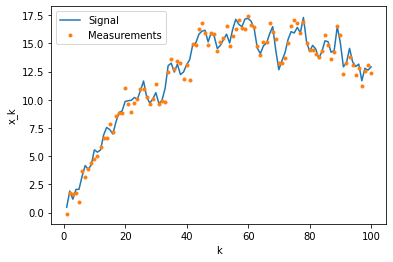

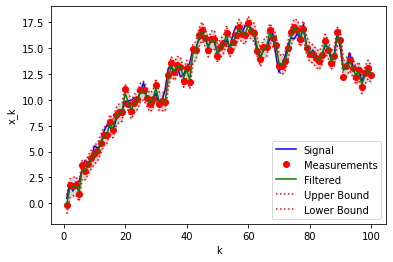

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
sig_w = 1
sig_v = 0.5
M = np.array([1])
Q = sig_w**2
H = np.array([1])
R = sig_v**2

# Initialize
m0 = 0
P0 = 1

# Simulate data
np.random.seed(1234)
steps = 100
T = np.arange(1, steps + 1)
X = np.zeros(steps)
Y = np.zeros(steps)
x = m0

for k in range(steps):
    w = Q * np.random.randn(1)
    x = M * x + w
    y = H * x + sig_v * np.random.randn(1)
    X[k] = x
    Y[k] = y

plt.plot(T, X, '-', label='Signal')
plt.plot(T, Y, '.', label='Measurements')
plt.legend()
plt.xlabel('k')
plt.ylabel('x_k')

# Kalman filter
m = m0
P = P0
kf_m = np.zeros(steps)
kf_P = np.zeros(steps)

for k in range(steps):
    # Predicition
    m = M * m
    P = M * P * M.T + Q
    # Correction
    d = Y[k] - H * m     # Innovation
    S = H * P * H.T + R  # measurement covariance
    K = P * H.T / S      # Kalman gain
    # Update
    m = m + K * d
    P = P - K * S * K.T

    kf_m[k] = m
    kf_P[k] = P

# Plot
plt.figure()
plt.fill_between(T, kf_m + 1.96 * np.sqrt(kf_P), kf_m - 1.96 * np.sqrt(kf_P),
                 facecolor='lightgray', edgecolor='lightgray')
plt.plot(T, X, '-b', label='Signal')
plt.plot(T, Y, 'or', label='Measurements')
plt.plot(T, kf_m, '-g', label='Filtered')
plt.plot(T, kf_m + 1.96 * np.sqrt(kf_P), ':r', label='Upper Bound')
plt.plot(T, kf_m - 1.96 * np.sqrt(kf_P), ':r', label='Lower Bound')
plt.legend()
plt.xlabel('k')
plt.ylabel('x_k')
plt.show()

## Conclusions

1. The KF tracks the random noise very efficiently and accurately.
2. The complete KF is coded in only 7 lines, exactly as prescribed by the theory. This is the reason for the excellent performance of the KF, in particular in real-time systems. 
3. In higher dimensions, when the matrices become large, more attention must be paid to the numerical linear algebra routines used. The inversion of the measurement covariance matrix, $S,$ is particularly challenging and requires highly-tuned matrix decomposition methods.